### Importing Libraries

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [82]:
# from google.colab import drive
# drive.mount('/content/drive')

Opening the CSV

In [83]:
# df = pd.read_csv('/content/drive/MyDrive/MyWork/Sem7/DSc/DSc_Project/second_data_cleaned.csv')
df = pd.read_csv('second_data_cleaned.csv')

Check Shape

In [84]:
# Check shape of the data
df.shape

(61069, 21)

In [85]:
# Check the data types of the columns
df.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [86]:
# Check unique values for each column
df.nunique()

class                      2
cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-root                  5
stem-surface               8
stem-color                13
veil-type                  1
veil-color                 6
has-ring                   2
ring-type                  8
spore-print-color          7
habitat                    8
season                     4
dtype: int64

- Labels are Stored in `labels` variable

In [87]:
# Store the class labels in a variable and drop the column from the dataframe
labels = df['class']
df.drop(columns=['class'], axis=1, inplace=True)

df.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


In [88]:
# Check missing values
df.isna().sum()

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [89]:
# Check percentage of missing values for each column
df.isna().sum() / len(df) * 100

cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.121387
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.184971
gill-spacing            41.040462
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.393064
stem-surface            62.427746
stem-color               0.000000
veil-type               94.797688
veil-color              87.861272
has-ring                 0.000000
ring-type                4.046243
spore-print-color       89.595376
habitat                  0.000000
season                   0.000000
dtype: float64

In [90]:
# Drop columns with more than 50% missing values
df.drop(['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color'], axis=1, inplace=True)

In [91]:
df.shape

(61069, 15)

In [92]:
df.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,w,t,g,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,w,t,g,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,w,t,g,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,w,t,p,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,w,t,p,d,w


### Label Encoding

In [93]:
# Handling remaining missing values
df.isna().sum()

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
dtype: int64

In [94]:
# Separate columns with missing values
missing_val_columns = df.columns[df.isnull().mean() > 0]
feature_columns = [col for col in df.columns if col not in missing_val_columns]

In [95]:
# Label encode categorical columns in features
label_encoders = {}
for col in feature_columns:
    if df[col].dtype == 'object':  # if the column has categorical data
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [96]:
# Handle missing values in the target column
for target_col in missing_val_columns:
    # Separate data
    train_data = df[df[target_col].notnull()]
    test_data = df[df[target_col].isnull()]
    
    X_train = train_data[feature_columns]
    y_train = train_data[target_col]
    X_test = test_data[feature_columns]
    
    # If there's only one unique class in y_train, fill missing values with this class
    if y_train.nunique() == 1:
        df.loc[df[target_col].isnull(), target_col] = y_train.iloc[0]
        continue  # move to the next column
    
    # Label encode the target column
    le_target = LabelEncoder()
    y_train = le_target.fit_transform(y_train)
    
    # Train a logistic regression model
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    
    # Predict missing values
    y_pred = lr.predict(X_test)
    y_pred = le_target.inverse_transform(y_pred)
    
    # Fill missing values in the original dataframe
    df.loc[df[target_col].isnull(), target_col] = y_pred

# Decode the label encoded feature columns back to original values
for col, le in label_encoders.items():
    df[col] = le.inverse_transform(df[col])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [103]:
df.isna().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [104]:
# Check unique values for each column
df.nunique()

cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-color                13
has-ring                   2
ring-type                  8
habitat                    8
season                     4
dtype: int64

In [98]:
df.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w
1,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u
2,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w
3,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w
4,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w


### Label Encoder and Standard Scaler

In [100]:
# Copying the dataframe and converting all the categorical columns to numeric

# Performing Label Encoding and Standard Scaling
df_numeric = df.copy()
le = LabelEncoder()
scaler = StandardScaler()

for col in df_numeric.columns:
    if df_numeric[col].dtype != 'object':
      df_numeric[col] = scaler.fit_transform(df_numeric[col].to_numpy().reshape(-1,1))
    else:
      df_numeric[col] = le.fit_transform(df_numeric[col])

df_numeric.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1.619462,6,2,6,0,2,0,10,3.076705,0.492293,11,1,2,0,3
1,1.873982,6,2,6,0,2,0,10,3.385311,0.601900,11,1,2,0,2
2,1.393432,6,2,6,0,2,0,10,3.328931,0.557061,11,1,2,0,3
3,1.412426,2,3,1,0,2,0,10,2.726555,0.381690,11,1,5,0,3
4,1.501699,6,3,6,0,2,0,10,2.952075,0.503254,11,1,5,0,3


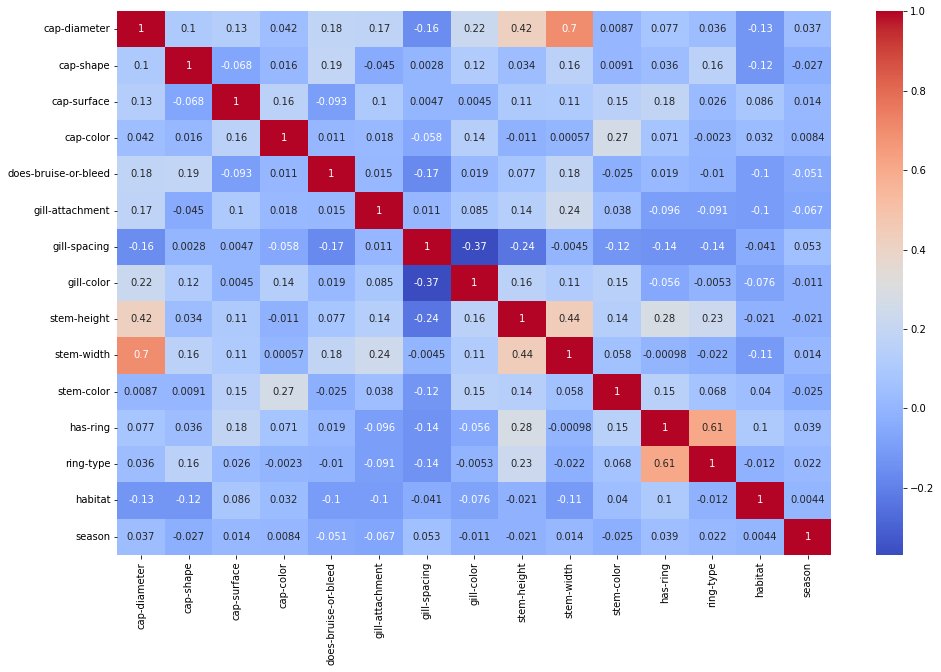

In [101]:
fig = plt.figure(figsize=(16,10))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True)
plt.show()

In [102]:
df_numeric.describe()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
count,6.106900e+04,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,6.106900e+04,6.106900e+04,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000
mean,5.212516e-17,4.041641,5.585207,6.144541,0.173410,2.404968,0.280322,7.338502,2.233935e-16,-1.154200e-16,8.429072,0.248555,1.573204,0.623721,1.053300
std,1.000008e+00,2.138630,3.178593,3.171077,0.378605,2.168175,0.581676,3.186426,1.000008e+00,1.000008e+00,3.218516,0.432179,1.642791,1.265880,1.100575
min,-1.206855e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.952985e+00,-1.210598e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.180393e-01,2.000000,3.000000,5.000000,0.000000,0.000000,0.000000,5.000000,-5.761259e-01,-6.914605e-01,6.000000,0.000000,1.000000,0.000000,0.000000
50%,-1.659805e-01,5.000000,7.000000,5.000000,0.000000,2.000000,0.000000,7.000000,-1.874007e-01,-1.952406e-01,11.000000,0.000000,1.000000,0.000000,1.000000
75%,3.430605e-01,6.000000,8.000000,10.000000,0.000000,4.000000,0.000000,10.000000,3.437583e-01,4.404789e-01,11.000000,0.000000,1.000000,1.000000,2.000000
max,1.056187e+01,6.000000,10.000000,11.000000,1.000000,6.000000,2.000000,11.000000,8.112329e+00,9.143259e+00,12.000000,1.000000,7.000000,7.000000,3.000000


In [105]:
# Saving the dataframs to csv files
df.to_csv('Data_Preproc_NoEncoding.csv', index=False)

df_numeric.to_csv('Data_Preproc_Encoded.csv', index=False)

# Save the labels as a csv file
labels.to_csv('Labels.csv', index=False)